<a href="https://colab.research.google.com/github/snehagandla30/Oasis-Infobyte/blob/main/EDA_on_Retail_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving retail_sales_dataset.csv to retail_sales_dataset.csv


Dataset Loaded succcessfully
Shape: 1000rows x 9coloumns


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100



Basic Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB

 Missing Values per column:
Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

 Cleaning Data
Data Cleaned Successfully!
Remaining missing values:
 0



/tmp/ipython-input-219580899.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-219580899.py:29: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

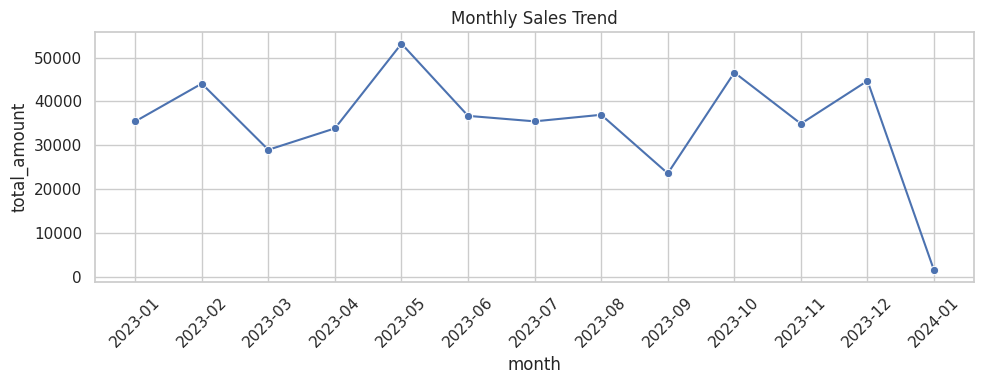

/tmp/ipython-input-219580899.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_sales.values, y=top_sales.index, palette='viridis')


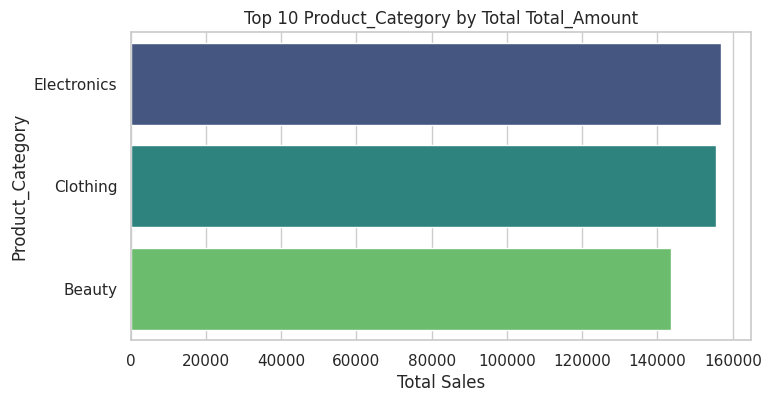

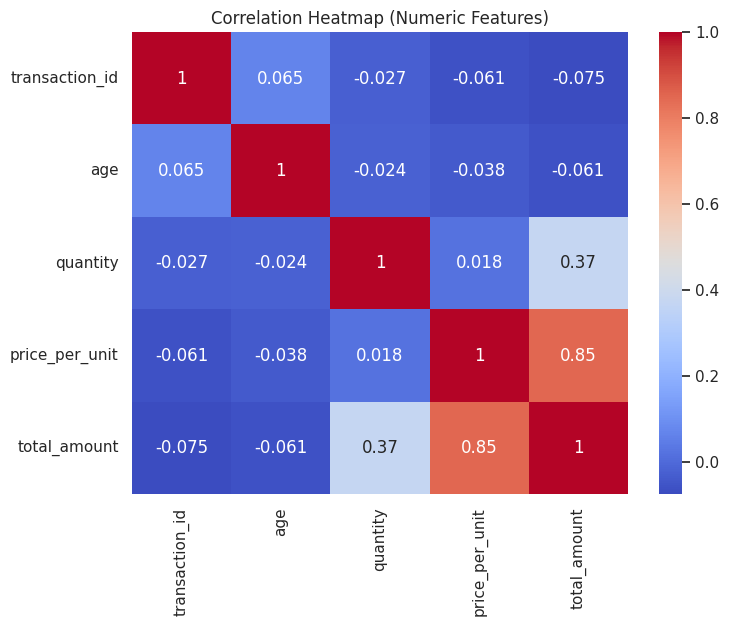

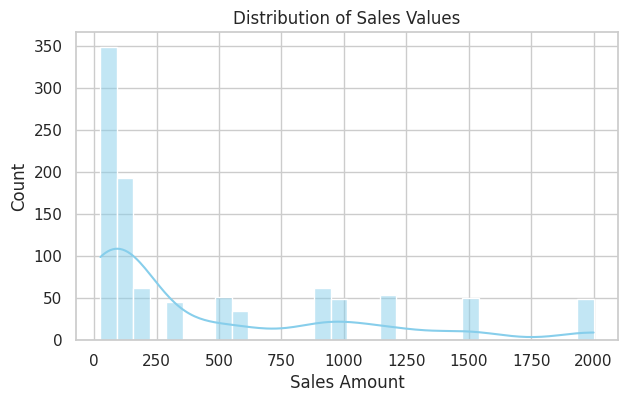


 Key Insights & Recommendations.
Sales trend shows possible seasonality target high-sales months with campaigns.
Top categories/products drive most revenue- focus promotions here.
Data cleaning removed missing and inconsistent values.
Correlation map can guide feature selection for prediction models.

 EDA Completed Successfully!


In [ ]:
# Project 1: EDA on Retails Sales Data
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#Step 1: Load the dataset
file_name = "retail_sales_dataset.csv"
df = pd.read_csv(file_name)

print("Dataset Loaded succcessfully")
print(f"Shape: {df.shape[0]}rows x {df.shape[1]}coloumns")
display(df.head())

# Step 2: Basic Data Info
print("\nBasic Data Information:")
df.info()
print("\n Missing Values per column:")
print(df.isna().sum())

# Step 3: Data Cleaning
print("\n Cleaning Data")
for col in df.select_dtypes(include=[np.number]).columns:
  df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object']).columns:
  df[col].fillna('Unknown',inplace=True)

for col in df.columns:
  if 'date' in col.lower():
    try:
      df[col]=pd.to_datetime(df[col])
    except:
      pass


df.columns = [c.strip().lower().replace(' ','_') for c in df.columns]
print("Data Cleaned Successfully!")
print("Remaining missing values:\n",df.isna().sum().sum())

# Step 4: Descriptive Statististics
date_cols = [c for c in df.columns if np.issubdtype(df[c].dtype, np.datetime64)]
if date_cols:
  date_col = date_cols[0]
  print(f"\n Using'{date_col}' for time-series analysis.")
  sales_col = None
  for keyword in ['sales', 'amount', 'revenue', 'total']:
    for c in df.columns:
      if keyword in c.lower():
        sales_col = c
        break
    if sales_col:
      break

  if sales_col:
    df['month'] = df[date_col].dt.to_period('M').astype(str)
    monthly = df.groupby('month')[sales_col].sum().reset_index()

    plt.figure(figsize=(10,4))
    sns.lineplot(data=monthly, x='month', y=sales_col, marker='o')
    plt.xticks(rotation=45)
    plt.title("Monthly Sales Trend")
    plt.tight_layout()
    plt.show()
  else:
    print("No numeric sales column found for time-series plot.")
else:
    print("\n No date column found - skipping time-series analysis.")

cat_col= None
for keyword in ['category', 'product', 'item']:
  for c in df.columns:
    if keyword in c.lower():
      cat_col = c
      break
    if cat_col:
      break


if cat_col and sales_col:
  top_sales = df.groupby(cat_col)[sales_col].sum().sort_values(ascending=False).head(10)
  plt.figure(figsize=(8,4))
  sns.barplot(x=top_sales.values, y=top_sales.index, palette='viridis')
  plt.title(f"Top 10 {cat_col.title()} by Total {sales_col.title()}")
  plt.xlabel("Total Sales")
  plt.ylabel(cat_col.title())
  plt.show()
elif cat_col:
  plt.figure(figsize=(8,4))
  sns.countplot(y=cat_col, data=df, order=df[cat_col].value_counts().index[:10])
  plt.title(f"Top 10 {cat_col.title()}by Count")
  plt.show()
else:
  print("No category/product column found for bar chart.")

num_df = df.select_dtypes(include=[np.number])
if num_df.shape[1]>1:
  plt.figure(figsize=(8,6))
  sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
  plt.title("Correlation Heatmap (Numeric Features)")
  plt.show()
else:
  print("Not enough numeric features for correlation heatmap.")

if sales_col:
  plt.figure(figsize=(7,4))
  sns.histplot(df[sales_col], bins=30, kde=True, color='skyblue')
  plt.title("Distribution of Sales Values")
  plt.xlabel("Sales Amount")
  plt.show()

# Step 6: Key Insights
print("\n Key Insights & Recommendations.")
print("Sales trend shows possible seasonality target high-sales months with campaigns.")
print("Top categories/products drive most revenue- focus promotions here.")
print("Data cleaning removed missing and inconsistent values.")
print("Correlation map can guide feature selection for prediction models.")
print("\n EDA Completed Successfully!")